In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Import data
cz_flows = pd.read_csv("./data/opp_migration_with_features.csv")

In [2]:
cz_flows.head()

,o_cz,d_cz,n,n_tot_o,n_tot_d,o_d_distance,o_census_2000_population,o_urban_areas,o_frac_black,o_racial_segregation,...,d_migration_inflow_rate,d_migration_outlflow_rate,d_frac_foreign_born,d_social_capital_index,d_fraction_religious,d_violent_crime_rate,d_fraction_of_children_with_single_mothers,d_fraction_of_adults_divorced,d_fraction_of_adults_married,d_income_growth_2000_2006_10
0,6502,100,127,22148,56915,233.396750,203077,1,0.032919,0.074607,...,0.00564,0.004697,0.011784,-0.297858,0.514403,0.001409,0.189803,0.110173,0.600893,-0.002278
1,34108,100,0,1702,56915,5586.842924,13913,0,0.009272,0.075959,...,0.00564,0.004697,0.011784,-0.297858,0.514403,0.001409,0.189803,0.110173,0.600893,-0.002278
2,10302,100,16,26182,56915,647.238506,223605,1,0.212549,0.142392,...,0.00564,0.004697,0.011784,-0.297858,0.514403,0.001409,0.189803,0.110173,0.600893,-0.002278
3,5201,100,1,6530,56915,633.004265,54214,1,0.184620,0.087787,...,0.00564,0.004697,0.011784,-0.297858,0.514403,0.001409,0.189803,0.110173,0.600893,-0.002278
4,29201,100,0,2794,56915,1229.687706,21441,0,0.009888,0.114814,...,0.00564,0.004697,0.011784,-0.297858,0.514403,0.001409,0.189803,0.110173,0.600893,-0.002278


In [6]:
cz_flows.describe()

,o_cz,d_cz,n,n_tot_o,n_tot_d,o_d_distance,o_census_2000_population,o_urban_areas,o_frac_black,o_racial_segregation,...,d_migration_inflow_rate,d_migration_outlflow_rate,d_frac_foreign_born,d_social_capital_index,d_fraction_religious,d_violent_crime_rate,d_fraction_of_children_with_single_mothers,d_fraction_of_adults_divorced,d_fraction_of_adults_married,d_income_growth_2000_2006_10
count,549081.000000,549081.000000,5.490810e+05,5.490810e+05,5.490810e+05,549081.000000,5.490810e+05,549081.000000,549081.000000,549081.000000,...,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000,549081.000000
mean,22443.815115,22443.815115,5.722583e+01,4.242170e+04,4.242170e+04,1625.009891,3.797866e+05,0.438596,0.077820,0.129757,...,0.016477,0.016795,0.041163,0.168877,0.545552,0.001571,0.201726,0.096649,0.574457,-0.001675
std,11118.039576,11118.039576,3.263886e+03,1.098934e+05,1.116513e+05,1147.378119,1.046520e+06,0.496216,0.122141,0.099990,...,0.010299,0.007503,0.050387,1.277856,0.167047,0.001408,0.052975,0.017939,0.046844,0.012193
min,100.000000,100.000000,-2.000000e+00,1.210000e+02,1.220000e+02,0.000000,1.193000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.198993,0.110493,0.000000,0.081761,0.039504,0.372919,-0.118081
25%,12701.000000,12701.000000,0.000000e+00,4.460000e+03,3.611000e+03,859.808480,3.838400e+04,0.000000,0.003507,0.056115,...,0.009825,0.011938,0.012375,-0.757008,0.424567,0.000846,0.170597,0.084618,0.545405,-0.007715
50%,26106.000000,26106.000000,0.000000e+00,1.189300e+04,1.043900e+04,1384.468366,1.038420e+05,0.000000,0.021859,0.107352,...,0.014167,0.015540,0.024069,0.063928,0.524668,0.001351,0.196327,0.097997,0.579520,-0.002401
75%,31301.000000,31301.000000,3.000000e+00,3.383400e+04,3.263000e+04,2045.681401,2.898490e+05,1.000000,0.082248,0.180903,...,0.020788,0.020399,0.046056,0.932727,0.643264,0.001935,0.226241,0.108558,0.606677,0.004093
max,39400.000000,39400.000000,1.400000e+06,1.755308e+06,1.713298e+06,8444.130876,1.639336e+07,1.000000,0.658326,0.553745,...,0.077018,0.052476,0.396842,7.305450,1.308379,0.027579,0.433681,0.190349,0.694725,0.045762


In [7]:
var_importance = pd.read_csv("./data/var_importance.csv")

In [20]:
# import sys
# sys.executable
# !{sys.executable} -m pip install geojson

  Using cached geojson-3.0.1-py3-none-any.whl (15 kB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [22]:
import geojson
with open("./data/cz_cpc_measures.geojson") as f:
    gj = geojson.load(f)


In [30]:
perf = pd.DataFrame([x['properties'] for x in gj['features']])
perf.head()

,tile_ID,commuting_zone_name,state,population,tot_outflow,gravity_cpc,rad_cpc,gravity_rmse,rad_rmse,rf_cpc,rf_rmse
0,100.0,Johnson City,Tennessee,57198,14370,0.23508,0.11520,73.550607,124.612205,0.37319,61.686294
1,10000.0,Panama City,Florida,19631,7901,0.40473,0.16516,21.852901,50.929047,0.40228,24.636573
2,1001.0,Boone,North Carolina,6397,2979,0.33425,0.19086,8.192982,26.879433,0.37627,12.991343
3,1002.0,Morganton,North Carolina,16767,6451,0.29494,0.16757,21.801619,53.949721,0.38054,34.019543
4,10101.0,Bainbridge,Georgia,5045,2191,0.33682,0.11779,6.238866,29.270642,0.36792,16.763620


In [42]:
perf[perf['state'] == 'New York']

,tile_ID,commuting_zone_name,state,population,tot_outflow,gravity_cpc,rad_cpc,gravity_rmse,rad_rmse,rf_cpc,rf_rmse,o_cz,urban
102,16500.0,Erie,New York,74002,25567,0.31638,0.11816,91.527665,161.929889,0.37849,117.338757,16500,1
121,17700.0,Syracuse,New York,125184,39160,0.29120,0.16661,156.878543,251.702206,0.40607,118.778430,17700,1
122,17800.0,Oneonta,New York,18611,8622,0.34880,0.19755,23.673414,56.280928,0.39327,31.180187,17800,0
123,17900.0,Union,New York,33438,13289,0.34600,0.16330,40.951417,90.029954,0.38036,44.609298,17900,1
125,18000.0,Buffalo,New York,273198,65727,0.22889,0.10065,352.317139,492.366721,0.34777,407.439736,18000,1
126,18100.0,Elmira,New York,37491,15364,0.35740,0.18347,45.554656,92.564378,0.39944,48.446898,18100,1
127,18201.0,Olean,New York,23187,10265,0.34469,0.23062,29.299595,59.679814,0.37795,59.510266,18201,0
129,18300.0,Watertown,New York,27353,10596,0.31736,0.17123,34.647773,67.162393,0.39233,33.901354,18300,1
130,18400.0,Plattsburgh,New York,18600,6308,0.28697,0.13767,23.680162,56.212042,0.37180,37.733539,18400,0
131,18500.0,Amsterdam,New York,12972,5186,0.29524,0.23211,17.009447,46.162252,0.36396,36.464052,18500,0


In [37]:
urban = cz_flows[['o_cz', 'o_urban_areas']].drop_duplicates()
urban = urban.rename({"o_urban_areas": "urban"}, axis=1)
perf = perf.merge(urban, left_on='tile_ID', right_on='o_cz')

In [41]:
perf.groupby(['urban']).size()

urban
0    416
1    325
dtype: int64

In [48]:
perf['rf-gravity'] = perf['rf_cpc'] - perf['gravity_cpc']

In [59]:
order= perf.groupby("state")['rf-gravity'].mean().sort_values(ascending=False).index

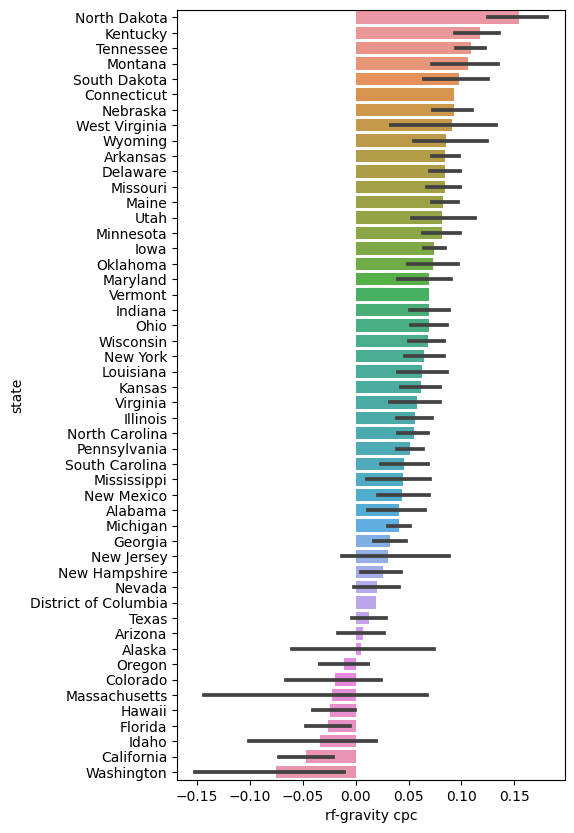

In [62]:
plt.figure(figsize=(5,10))
ax = sns.barplot(data=perf, y='state', x='rf-gravity', order=order)
ax.set_xlabel("rf-gravity cpc")
plt.savefig("rf-gravity_cpc.png", bbox_inches='tight')

In [63]:
## feature importance
var_importance = pd.read_csv("./data/var_importance.csv")

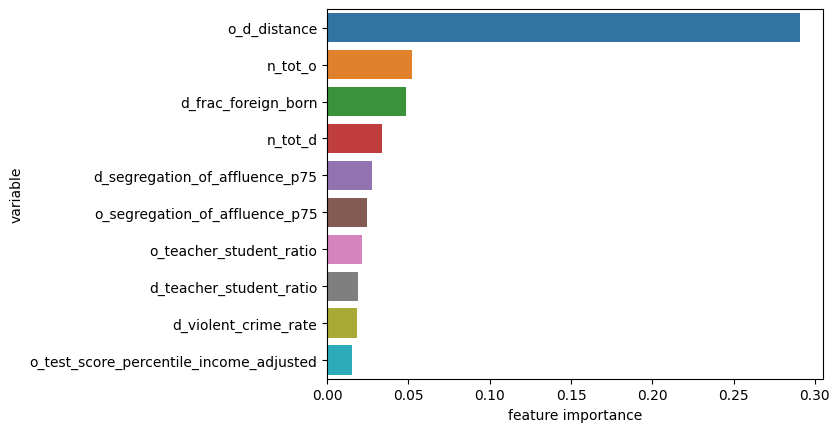

In [69]:
ax = sns.barplot(data=var_importance.iloc[:10], y='variable', x='importance')
ax.set_xlabel("feature importance")
plt.savefig("./figures/rf-feature_importance.png", bbox_inches='tight')

In [64]:
var_to_readable = {
    "o_d_distance": "distance",
    "n_tot_o": "total_outflow",
    "d_frac_foreign_born": ""
}
var['variable'].apply(lambda r: )

,variable,importance
0,o_d_distance,0.290528
1,n_tot_o,0.052045
2,d_frac_foreign_born,0.048698
3,n_tot_d,0.033461
4,d_segregation_of_affluence_p75,0.027685
...,...,...
72,o_fraction_of_children_with_single_mothers,0.002043
73,o_migration_outlflow_rate,0.002024
74,d_state_eitc_exposure,0.001153
75,o_urban_areas,0.000304
